In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import zipfile
import os

# Load Data from google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/JL_CORPUS.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


# Normalization

Sample rate : 44100
Original audio :


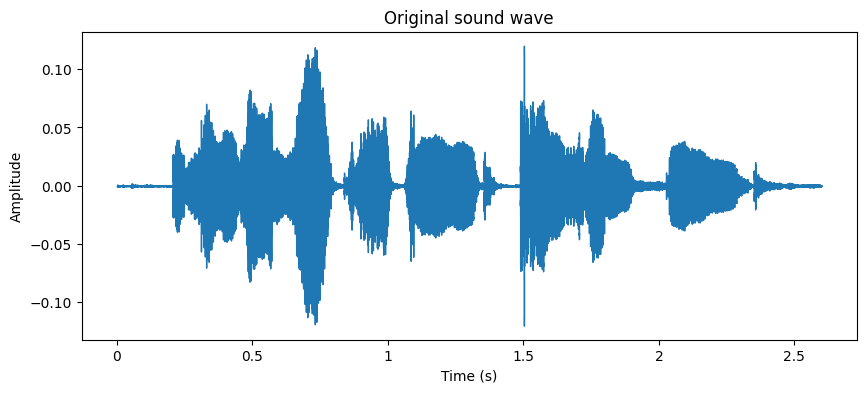

Original sample rate: 44100
Resampled to: 16000
Audio after resampling :


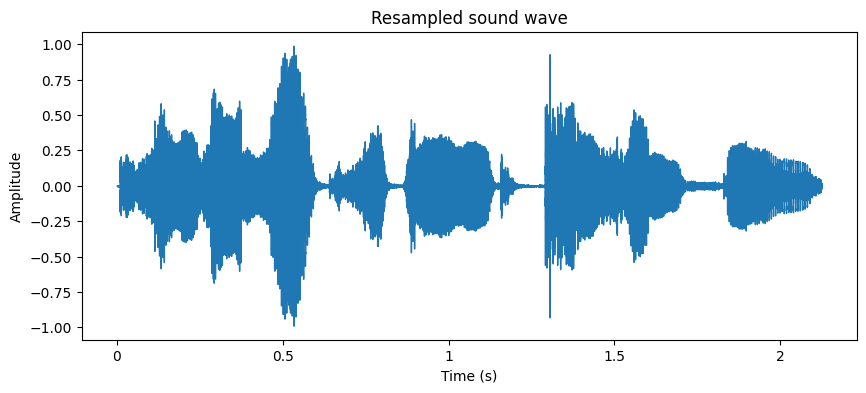

In [ ]:
file_path = "/content/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)/female1_angry_4a_2.wav"
y, sr = librosa.load(file_path, sr=None)  # Load with native sample rate

print("Sample rate : " + str(sr))

# Play original audio
print("Original audio :")
display(Audio(y, rate=sr))

# Show original sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Normalization based on maximum amplitude
y_normalized = y / np.max(np.abs(y))

# Remove silence from the beginning and end
y_trimmed, index = librosa.effects.trim(y_normalized, top_db=20)

# Resampling at 16000 Hz
target_sr = 16000
y_resampled = librosa.resample(y_trimmed, orig_sr=sr, target_sr=target_sr)

print(f"Original sample rate: {sr}")
print(f"Resampled to: {target_sr}")

# Play resampled audio
print("Audio after resampling :")
display(Audio(y_resampled, rate=target_sr))

# Show resampled sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title("Resampled sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
